In [29]:
!pip install mlrose_ky

In [30]:
import numpy as np
import time
import matplotlib.pyplot as plt
import mlrose_ky as mlrose
import random

FOUR PEAKS

In [31]:
fitness_function = mlrose.FourPeaks(t_pct=0.15)
problem = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness_function, maximize = True, max_val = 2)
RANDOM_STATE = 42

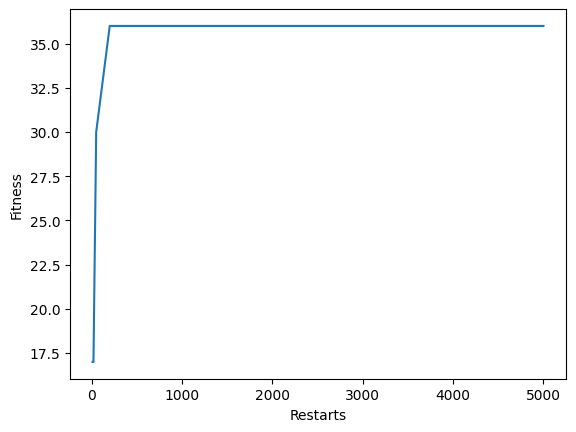

BEST REStarts :  200


In [32]:
#RANDOM HILL CLIMBING

curr_best_fitness = 0
curr_best_restart = None

fitness_scores = []
restarts = [10, 20 , 50, 100, 200, 500 , 1000 , 2000, 5000]
for number in restarts:
  best_state , best_fitness,dg = mlrose.random_hill_climb(problem, max_iters=1000, restarts=number, random_state= RANDOM_STATE)
  fitness_scores.append(best_fitness)
  if best_fitness > curr_best_fitness:
    curr_best_fitness = best_fitness
    curr_best_restart = number

fitness_scores = np.array(fitness_scores)
plt.plot(restarts , fitness_scores , label = 'RESTARTS')
plt.xlabel("Restarts")
plt.ylabel("Fitness")
plt.show()

print("BEST REStarts : " , curr_best_restart)



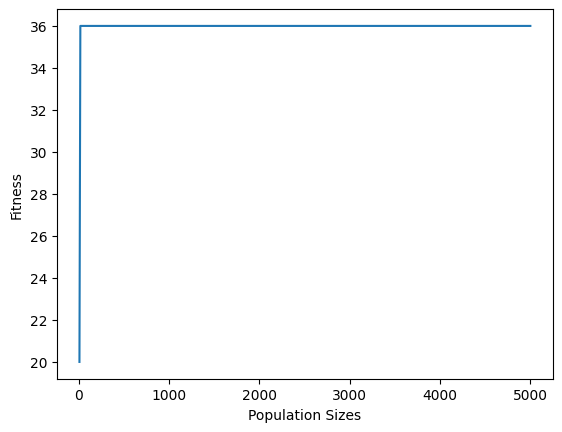

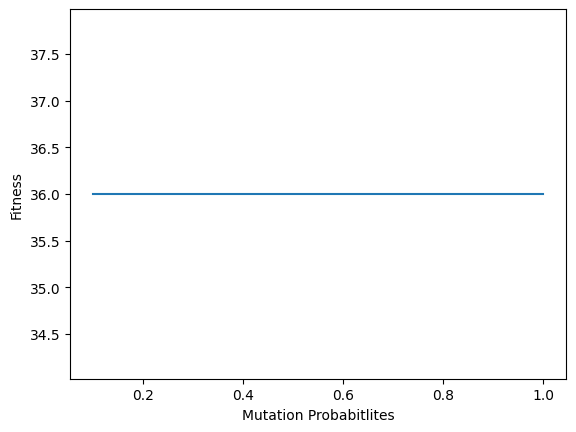

BESt Pop size 20
BEST MUTATION PROB 0.1
BEST FITNESS 36.0


In [33]:
# GENETIC ALGORITHM

curr_best_fitness = 0
curr_best_ps= 0
curr_best_mp = 0

initial_state = np.array([0 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,0 ,1, 0 ,1, 0, 0, 0, 1, 1])
fitness_scores = []
population_sizes = [10, 20 , 50, 100, 200, 500 , 1000 , 2000, 5000]


#FIND BEST POPULATION SIZE
for number in population_sizes:
  best_state, best_fitness, curve_ga = mlrose.genetic_alg(problem, pop_size=number, mutation_prob=0.1,max_attempts=100, max_iters=1000, random_state=RANDOM_STATE)
  fitness_scores.append(best_fitness)
  if best_fitness > curr_best_fitness:
    curr_best_fitness = best_fitness
    curr_best_ps = number


fitness_scores = np.array(fitness_scores)
plt.plot( population_sizes, fitness_scores , label = 'GA Population Size')
plt.xlabel("Population Sizes")
plt.ylabel("Fitness")
plt.show()


curr_best_fitness = 0
fitness_scores = []
mutations = [0.1,0.2,0.5,0.7,1]


#FIND BEST MUTATION PROB
for number in mutations:
  best_state, best_fitness, curve_ga = mlrose.genetic_alg(problem, pop_size=curr_best_ps, mutation_prob=number, max_attempts=100, max_iters=1000, random_state=RANDOM_STATE )
  fitness_scores.append(best_fitness)
  if best_fitness > curr_best_fitness:
    curr_best_fitness = best_fitness
    curr_best_mp = number


fitness_scores = np.array(fitness_scores)
plt.plot(mutations , fitness_scores , label = 'GA Mutation probability')
plt.xlabel("Mutation Probabitlites")
plt.ylabel("Fitness")
plt.show()


print("BESt Pop size" , curr_best_ps)
print("BEST MUTATION PROB" , curr_best_mp)
print("BEST FITNESS" , curr_best_fitness)

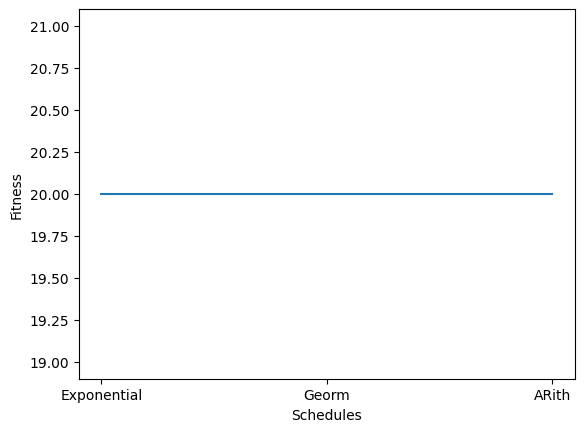

curr best schedule  ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001)


In [34]:
# SIMULATED ANNEALING
# SCHEDULE
curr_best_fitness = 0
curr_best_s= 0

fitness_scores = []

schedules = [mlrose.ExpDecay() ,mlrose.GeomDecay() , mlrose.ArithDecay() ]
#FIND BEST SCHEDULE
for schedule in schedules:
  best_state, best_fitness, curve_sa = mlrose.simulated_annealing(problem, schedule = schedule,
                                                          max_attempts = 100, max_iters = 1000,
                                                          init_state = None, random_state = RANDOM_STATE)

  fitness_scores.append(best_fitness)
  if best_fitness > curr_best_fitness:
    curr_best_fitness = best_fitness
    curr_best_s = schedule


fitness_scores = np.array(fitness_scores)
plt.plot(['Exponential' , 'Georm' , 'ARith'], fitness_scores , label = 'SCHEDULES')
plt.xlabel("Schedules")
plt.ylabel("Fitness")
plt.show()
print("curr best schedule " , curr_best_s)

Yes, when we meant iterations, we meant how many iterations/epochs did the algorithm take to converge (or not converge at all).

print(f"Function evaluations: {problem.fitness_evaluations}") # fitess evaluation/iterations


In [35]:
#MIMIC
# Parameter grid to search
pop_sizes = [100, 200, 300, 500]  # Different population sizes to test
keep_pcts = [0.1, 0.2, 0.3, 0.5]  # Different keep percentages to test

# Storage for the best parameters and fitness
best_fitness = -1
best_params = {}

# Run grid search
for pop_size in pop_sizes:
    for keep_pct in keep_pcts:
        print(f"Running MIMIC with pop_size={pop_size}, keep_pct={keep_pct}")
        # Run MIMIC algorithm
        best_state, fitness, fitness_curve = mlrose.mimic(problem,
                                                          pop_size=pop_size,
                                                          keep_pct=keep_pct,
                                                          max_attempts=100,
                                                          max_iters=1000,
                                                          curve=False,
                                                          random_state=42)

        # Check if this is the best fitness so far
        if fitness > best_fitness:
            best_fitness = fitness
            best_params = {
                'pop_size': pop_size,
                'keep_pct': keep_pct,
                'best_state': best_state
            }

# Output the best parameters and fitness
print(f"Best Parameters: {best_params}")
print(f"Best Fitness: {best_fitness}")
#Best Parameters: {'pop_size': 200, 'keep_pct': 0.1, 'best_state': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])}
#Best Fitness: 36.0

Running MIMIC with pop_size=100, keep_pct=0.1
Running MIMIC with pop_size=100, keep_pct=0.2
Running MIMIC with pop_size=100, keep_pct=0.3
Running MIMIC with pop_size=100, keep_pct=0.5
Running MIMIC with pop_size=200, keep_pct=0.1
Running MIMIC with pop_size=200, keep_pct=0.2
Running MIMIC with pop_size=200, keep_pct=0.3
Running MIMIC with pop_size=200, keep_pct=0.5
Running MIMIC with pop_size=300, keep_pct=0.1
Running MIMIC with pop_size=300, keep_pct=0.2
Running MIMIC with pop_size=300, keep_pct=0.3
Running MIMIC with pop_size=300, keep_pct=0.5
Running MIMIC with pop_size=500, keep_pct=0.1
Running MIMIC with pop_size=500, keep_pct=0.2
Running MIMIC with pop_size=500, keep_pct=0.3
Running MIMIC with pop_size=500, keep_pct=0.5
Best Parameters: {'pop_size': 200, 'keep_pct': 0.1, 'best_state': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])}
Best Fitness: 36.0


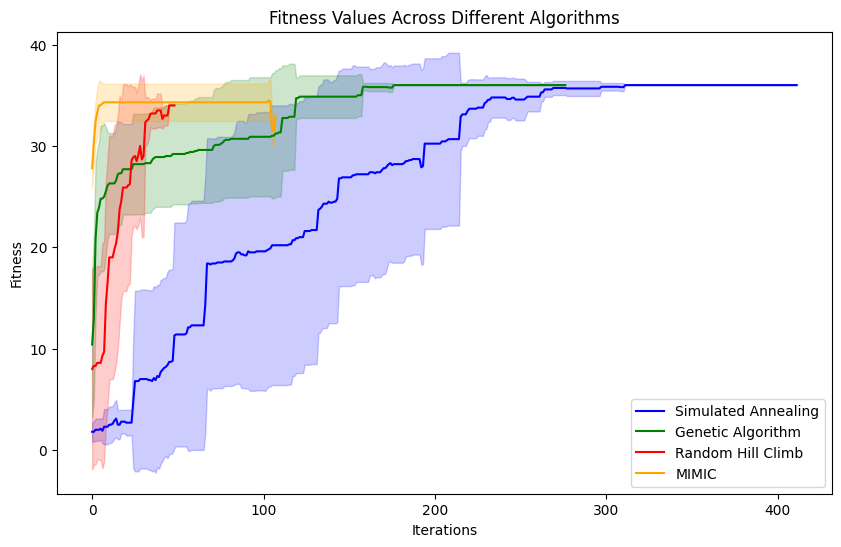

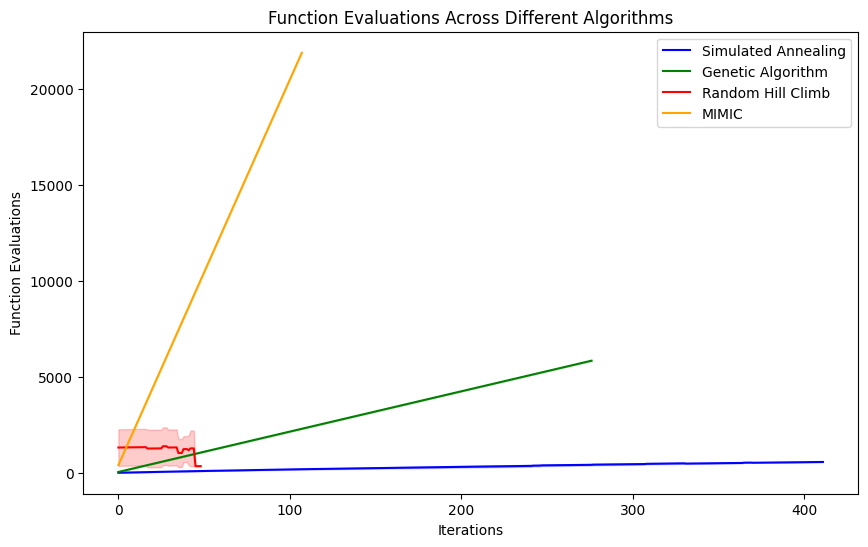

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of seeds and the random seeds array
seeds = [1,2,3,4,5,6,7,8,9,10]

# Placeholder lists to store fitness and function evaluation curves
fitness_curves_sa = []
fitness_curves_ga = []
fitness_curves_rhc = []
fitness_curves_mimic = []

fevals_curves_sa = []
fevals_curves_ga = []
fevals_curves_rhc = []
fevals_curves_mimic = []

schedule = mlrose.ExpDecay()
# Find the maximum number of iterations across all curves for padding
max_length = 1000  # Define a large enough length or compute dynamically if needed

# Function to pad curves to the same length
def pad_curve(curve, max_length):
    padded_curve = np.full((max_length, curve.shape[1]), np.nan)
    padded_curve[:curve.shape[0], :] = curve
    return padded_curve

# Iterate over each seed
for seed in seeds:
    # Simulated Annealing
    best_state, best_fitness, curve_sa = mlrose.simulated_annealing(problem, schedule=schedule,
                                                                    max_attempts=100, max_iters=1000,
                                                                    init_state=None, random_state=seed, curve=True )
    fitness_curves_sa.append(pad_curve(curve_sa[:, 0:1], max_length))  # pad only the fitness column
    fevals_curves_sa.append(pad_curve(curve_sa[:, 1:], max_length))    # pad only the fevals column

    # Genetic Algorithm
    best_state, best_fitness, curve_ga = mlrose.genetic_alg(problem, pop_size=20, mutation_prob=0.1,
                                                            max_attempts=100, max_iters=1000,
                                                            random_state=seed, curve=True )
    fitness_curves_ga.append(pad_curve(curve_ga[:, 0:1], max_length))
    fevals_curves_ga.append(pad_curve(curve_ga[:, 1:], max_length))

    # Random Hill Climb
    best_state, best_fitness, curve_rhc = mlrose.random_hill_climb(problem, max_iters=1000, restarts=200,
                                                                   random_state=seed, curve=True)
    fitness_curves_rhc.append(pad_curve(curve_rhc[:, 0:1], max_length))
    fevals_curves_rhc.append(pad_curve(curve_rhc[:, 1:], max_length))

    # MIMIC
    best_state, best_fitness, curve_mimic = mlrose.mimic(problem, pop_size=200,
                                                          keep_pct=0.1,
                                                          max_attempts=100,
                                                          max_iters=1000,
                                                          curve=True,
                                                          random_state=seed)
    fitness_curves_mimic.append(pad_curve(curve_mimic[:, 0:1], max_length))
    fevals_curves_mimic.append(pad_curve(curve_mimic[:, 1:], max_length))



# Convert lists to numpy arrays for easier computation
fitness_curves_sa = np.array(fitness_curves_sa).squeeze()
fitness_curves_ga = np.array(fitness_curves_ga).squeeze()
fitness_curves_rhc = np.array(fitness_curves_rhc).squeeze()
fitness_curves_mimic = np.array(fitness_curves_mimic).squeeze()

fevals_curves_sa = np.array(fevals_curves_sa).squeeze()
fevals_curves_ga = np.array(fevals_curves_ga).squeeze()
fevals_curves_rhc = np.array(fevals_curves_rhc).squeeze()
fevals_curves_mimic = np.array(fevals_curves_mimic).squeeze()

# Compute mean and standard deviation for fitness values
mean_fitness_sa = np.nanmean(fitness_curves_sa, axis=0)
std_fitness_sa = np.nanstd(fitness_curves_sa, axis=0)

mean_fitness_ga = np.nanmean(fitness_curves_ga, axis=0)
std_fitness_ga = np.nanstd(fitness_curves_ga, axis=0)

mean_fitness_rhc = np.nanmean(fitness_curves_rhc, axis=0)
std_fitness_rhc = np.nanstd(fitness_curves_rhc, axis=0)

mean_fitness_mimic = np.nanmean(fitness_curves_mimic, axis=0)
std_fitness_mimic = np.nanstd(fitness_curves_mimic, axis=0)

# Compute mean and standard deviation for function evaluations
mean_fevals_sa = np.nanmean(fevals_curves_sa, axis=0)
std_fevals_sa = np.nanstd(fevals_curves_sa, axis=0)

mean_fevals_ga = np.nanmean(fevals_curves_ga, axis=0)
std_fevals_ga = np.nanstd(fevals_curves_ga, axis=0)

mean_fevals_rhc = np.nanmean(fevals_curves_rhc, axis=0)
std_fevals_rhc = np.nanstd(fevals_curves_rhc, axis=0)

mean_fevals_mimic = np.nanmean(fevals_curves_mimic, axis=0)
std_fevals_mimic = np.nanstd(fevals_curves_mimic, axis=0)

# Plot the mean fitness values with error bars for standard deviation
plt.figure(figsize=(10,6))
plt.plot(mean_fitness_sa, label='Simulated Annealing', color='blue')
plt.fill_between(range(len(mean_fitness_sa)), mean_fitness_sa - std_fitness_sa, mean_fitness_sa + std_fitness_sa, color='blue', alpha=0.2)

plt.plot(mean_fitness_ga, label='Genetic Algorithm', color='green')
plt.fill_between(range(len(mean_fitness_ga)), mean_fitness_ga - std_fitness_ga, mean_fitness_ga + std_fitness_ga, color='green', alpha=0.2)

plt.plot(mean_fitness_rhc, label='Random Hill Climb', color='red')
plt.fill_between(range(len(mean_fitness_rhc)), mean_fitness_rhc - std_fitness_rhc, mean_fitness_rhc + std_fitness_rhc, color='red', alpha=0.2)

plt.plot(mean_fitness_mimic, label='MIMIC', color='orange')
plt.fill_between(range(len(mean_fitness_mimic)), mean_fitness_mimic - std_fitness_mimic, mean_fitness_mimic + std_fitness_mimic, color='orange', alpha=0.2)

plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend()
plt.title('Fitness Values Across Different Algorithms')
plt.show()

# Plot the mean function evaluations with error bars for standard deviation
plt.figure(figsize=(10,6))
plt.plot(mean_fevals_sa, label='Simulated Annealing', color='blue')
plt.fill_between(range(len(mean_fevals_sa)), mean_fevals_sa - std_fevals_sa, mean_fevals_sa + std_fevals_sa, color='blue', alpha=0.2)

plt.plot(mean_fevals_ga, label='Genetic Algorithm', color='green')
plt.fill_between(range(len(mean_fevals_ga)), mean_fevals_ga - std_fevals_ga, mean_fevals_ga + std_fevals_ga, color='green', alpha=0.2)

plt.plot(mean_fevals_rhc, label='Random Hill Climb', color='red')
plt.fill_between(range(len(mean_fevals_rhc)), mean_fevals_rhc - std_fevals_rhc, mean_fevals_rhc + std_fevals_rhc, color='red', alpha=0.2)

plt.plot(mean_fevals_mimic, label='MIMIC', color='orange')
plt.fill_between(range(len(mean_fevals_mimic)), mean_fevals_mimic - std_fevals_mimic, mean_fevals_mimic + std_fevals_mimic, color='orange', alpha=0.2)

plt.xlabel('Iterations')
plt.ylabel('Function Evaluations')
plt.legend()
plt.title('Function Evaluations Across Different Algorithms')
plt.show()


In [37]:
#RHC
def algos(n = 4, max_attempts =500, max_iters = 1000, RANDOM_STATE = 1):
  fitness_function = mlrose.FourPeaks(t_pct=0.15)
  problem = mlrose.DiscreteOpt(length = n, fitness_fn = fitness_function, maximize = True, max_val = 2)

  results = {
    'algorithm': [],
    'fitness': [],
    'iterations': [],
    'time': [],
    'fitness_curve' : [],
    'ans': []
  }

  #RHC
  # BEST MAX ITRS :  50
  # BEST RESTARTS :  500
  start = time.time()
  # best_state , best_fitness, curve_rhc = mlrose.random_hill_climb(problem, max_iters=50, restarts=500, random_state= RANDOM_STATE)
  best_state , best_fitness, curve_rhc = mlrose.random_hill_climb(problem, max_iters=1000, restarts=200, random_state= RANDOM_STATE)

  end = time.time()
  results['algorithm'].append('RHC')
  results['time'].append(end - start)
  results['ans'].append(best_state)
  results['fitness'].append(best_fitness)
  results['fitness_curve'].append(curve_rhc)


  #SA
  # BEST SCHEDULE ArithDecay(init_temp=1.0, decay=0.0001, min_temp=0.001)
  # BEST MAX ATTEMPTS 20
  # BEST MAX ITRS 10
  # BEST FITNESS 36.0
  schedule = mlrose.ExpDecay()
  # print(init_state)
  start = time.time()
  # best_state, best_fitness, curve_sa = mlrose.simulated_annealing(problem, schedule = schedule,
  #                                                       max_attempts = 20, max_iters = 10,
  #                                                       init_state = init_state, random_state = RANDOM_STATE , curve = True)
  best_state, best_fitness, curve_sa = mlrose.simulated_annealing(problem, schedule = schedule,
                                                        max_attempts = 100, max_iters = 1000,
                                                        init_state = None, random_state = RANDOM_STATE , curve = True)

  end = time.time()
  results['algorithm'].append('SA')
  results['time'].append(end - start)
  results['ans'].append(best_state)
  results['fitness'].append(best_fitness)
  results['fitness_curve'].append(curve_sa)


  # GA
  # BESt Pop seize 20
  # BEST MUTATION PROB 0.1
  # BEST MAX ITRS 100
  # BEST FITNESS 33.0
  population_size = 20
  mutation_prob = 0.1

  start = time.time()
  # Solve problem using the genetic algorithm
  best_state, best_fitness, curve_ga = mlrose.genetic_alg(problem, pop_size=population_size, mutation_prob=mutation_prob,
                                                        max_attempts=100, max_iters=1000, random_state=RANDOM_STATE , curve=True)
  end = time.time()
  results['algorithm'].append('GA')
  results['time'].append(end - start)
  results['ans'].append(best_state)
  results['fitness'].append(best_fitness)
  results['fitness_curve'].append(curve_ga)


  start = time.time()
  #MIMIC
  best_state, best_fitness, curve_ga = mlrose.mimic(problem, pop_size=200, keep_pct=0.1,
                                                        max_attempts=max_attempts, max_iters=max_iters, random_state=RANDOM_STATE , curve=True)
  end = time.time()
  results['algorithm'].append('MIMIC')
  results['time'].append(end - start)
  results['ans'].append(best_state)
  results['fitness'].append(best_fitness)
  results['fitness_curve'].append(curve_ga)


  return results


In [38]:
fitness_scores = {'GA' :[] , 'SA' : [] , 'RHC': [] , 'MIMIC': []}
times = {'GA' :[] , 'SA' : [] , 'RHC': [] , 'MIMIC' : []}
for i in range (3,50):
  results = algos(n = i, max_attempts =100, max_iters = 1000, RANDOM_STATE = 1)
  times['RHC'].append(results['time'][0])
  times['SA'].append(results['time'][1])
  times['GA'].append(results['time'][2])
  times['MIMIC'].append(results['time'][3])
  fitness_scores['RHC'].append(results['fitness'][0])
  fitness_scores['SA'].append(results['fitness'][1])
  fitness_scores['GA'].append(results['fitness'][2])
  fitness_scores['MIMIC'].append(results['fitness'][3])

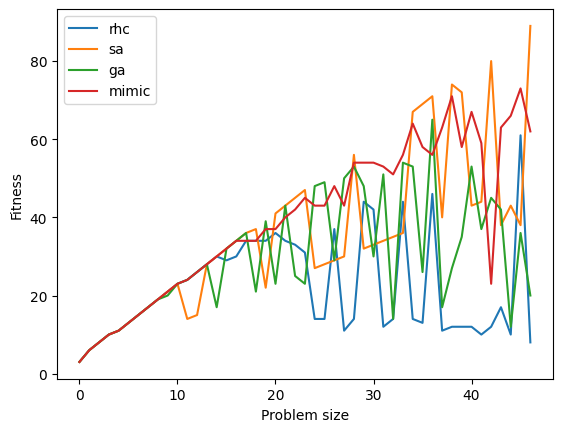

In [39]:
#FITNESS / SIZE
plt.plot( fitness_scores['RHC'] , label='rhc')
plt.plot( fitness_scores['SA'], label='sa')
plt.plot( fitness_scores['GA'], label='ga')
plt.plot( fitness_scores['MIMIC'], label='mimic')
plt.xlabel("Problem size")
plt.ylabel("Fitness")
plt.legend()
plt.show()

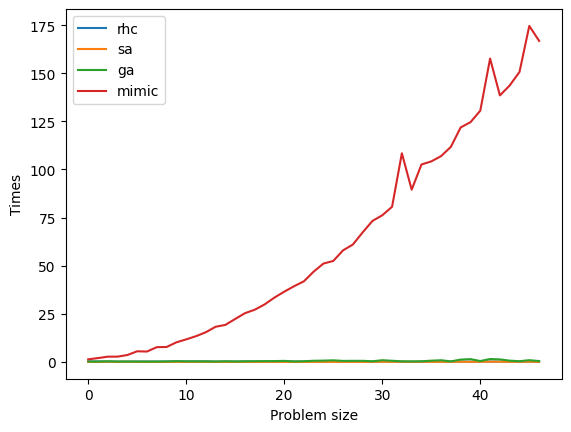

In [40]:
# FOR WALL CLOCK I LIKE TO SEE HOW TIME and problem SIZE were realted

plt.plot( times['RHC'] , label='rhc')
plt.plot( times['SA'], label='sa')
plt.plot( times['GA'], label='ga')
plt.plot( times['MIMIC'], label ='mimic')
plt.xlabel("Problem size")
plt.ylabel("Times")
plt.legend()
plt.show()

when curve=True,

Index = iteration

Column 1 = fitness score

Column 2 = total number of function evaluations for the problem function that you passed

Comment



###FLIP FLOP

In [41]:
fitness = mlrose.fitness = mlrose.FlipFlop()
problem = mlrose.DiscreteOpt(length=20, fitness_fn=fitness, maximize=True, max_val=2)
RANDOM_STATE = 42

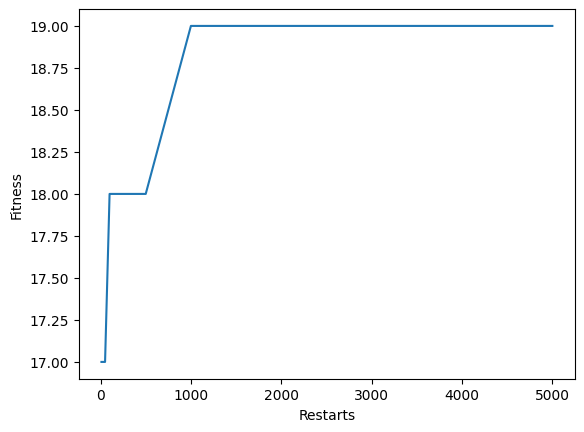

BEST REStarts :  1000


In [42]:
#RANDOM HILL CLIMBING

curr_best_fitness = 0
curr_best_restart = None

fitness_scores = []
restarts = [10, 20 , 50, 100, 200, 500 , 1000 , 2000, 5000]
for number in restarts:
  best_state , best_fitness,dg = mlrose.random_hill_climb(problem, max_iters=1000, restarts=number, random_state= RANDOM_STATE)
  fitness_scores.append(best_fitness)
  if best_fitness > curr_best_fitness:
    curr_best_fitness = best_fitness
    curr_best_restart = number

fitness_scores = np.array(fitness_scores)
plt.plot(restarts , fitness_scores , label = 'RESTARTS')
plt.xlabel("Restarts")
plt.ylabel("Fitness")
plt.show()

print("BEST REStarts : " , curr_best_restart)



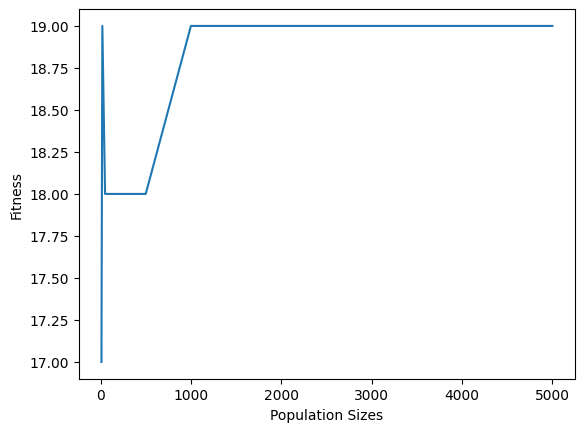

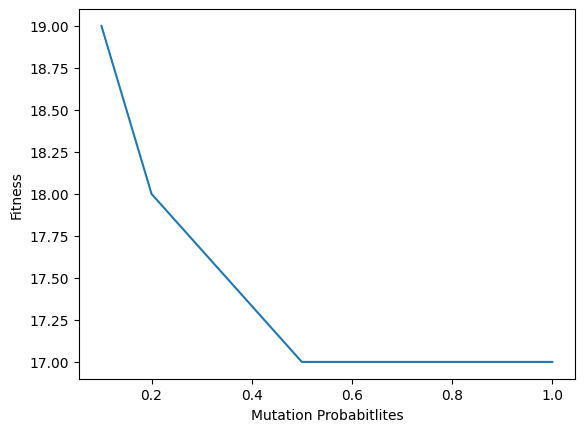

BESt Pop size 20
BEST MUTATION PROB 0.1
BEST FITNESS 19.0


In [44]:
# GENETIC ALGORITHM

curr_best_fitness = 0
curr_best_ps= 0
curr_best_mp = 0

initial_state = np.array([0 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,0 ,1, 0 ,1, 0, 0, 0, 1, 1])
fitness_scores = []
population_sizes = [10, 20 , 50, 100, 200, 500 , 1000 , 2000, 5000]


#FIND BEST POPULATION SIZE
for number in population_sizes:
  best_state, best_fitness, curve_ga = mlrose.genetic_alg(problem, pop_size=number, mutation_prob=0.1,max_attempts=100, max_iters=1000, random_state=RANDOM_STATE)
  fitness_scores.append(best_fitness)
  if best_fitness > curr_best_fitness:
    curr_best_fitness = best_fitness
    curr_best_ps = number


fitness_scores = np.array(fitness_scores)
plt.plot( population_sizes, fitness_scores , label = 'GA Population Size')
plt.xlabel("Population Sizes")
plt.ylabel("Fitness")
plt.show()


curr_best_fitness = 0
fitness_scores = []
mutations = [0.1,0.2,0.5,0.7,1]


#FIND BEST MUTATION PROB
for number in mutations:
  best_state, best_fitness, curve_ga = mlrose.genetic_alg(problem, pop_size=curr_best_ps, mutation_prob=number, max_attempts=100, max_iters=1000, random_state=RANDOM_STATE)
  fitness_scores.append(best_fitness)
  if best_fitness > curr_best_fitness:
    curr_best_fitness = best_fitness
    curr_best_mp = number
fitness_scores = np.array(fitness_scores)
plt.plot(mutations , fitness_scores , label = 'GA Mutation probability')
plt.xlabel("Mutation Probabitlites")
plt.ylabel("Fitness")
plt.show()


print("BESt Pop size" , curr_best_ps)
print("BEST MUTATION PROB" , curr_best_mp)
print("BEST FITNESS" , curr_best_fitness)

In [ ]:
# SIMULATED ANNEALING
# SCHEDULE
curr_best_fitness = 0
curr_best_s= 0

fitness_scores = []

schedules = [mlrose.ExpDecay() ,mlrose.GeomDecay() , mlrose.ArithDecay() ]
#FIND BEST SCHEDULE
for schedule in schedules:
  best_state, best_fitness, curve_sa = mlrose.simulated_annealing(problem, schedule = schedule,
                                                          max_attempts = 100, max_iters = 1000,
                                                          init_state = None, random_state = RANDOM_STATE)

  fitness_scores.append(best_fitness)
  if best_fitness > curr_best_fitness:
    curr_best_fitness = best_fitness
    curr_best_s = schedule


fitness_scores = np.array(fitness_scores)
plt.plot(['Exponential' , 'Georm' , 'ARith'], fitness_scores , label = 'SCHEDULES')
plt.xlabel("Schedules")
plt.ylabel("Fitness")
plt.show()
print("CURR BEST Pop size" , curr_best_s)

In [ ]:
#MIMIC
# Parameter grid to search
pop_sizes = [100, 200, 300, 500]  # Different population sizes to test
keep_pcts = [0.1, 0.2, 0.3, 0.5]  # Different keep percentages to test

# Storage for the best parameters and fitness
best_fitness = -1
best_params = {}

# Run grid search
for pop_size in pop_sizes:
    for keep_pct in keep_pcts:
        print(f"Running MIMIC with pop_size={pop_size}, keep_pct={keep_pct}")
        # Run MIMIC algorithm
        best_state, fitness, fitness_curve = mlrose.mimic(problem,
                                                          pop_size=pop_size,
                                                          keep_pct=keep_pct,
                                                          max_attempts=100,
                                                          max_iters=1000,
                                                          curve=False,
                                                          random_state=42)

        # Check if this is the best fitness so far
        if fitness > best_fitness:
            best_fitness = fitness
            best_params = {
                'pop_size': pop_size,
                'keep_pct': keep_pct,
                'best_state': best_state
            }

# Output the best parameters and fitness
print(f"Best Parameters: {best_params}")
print(f"Best Fitness: {best_fitness}")
# Best Parameters: {'pop_size': 100, 'keep_pct': 0.3, 'best_state': array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])}
# Best Fitness: 19.0

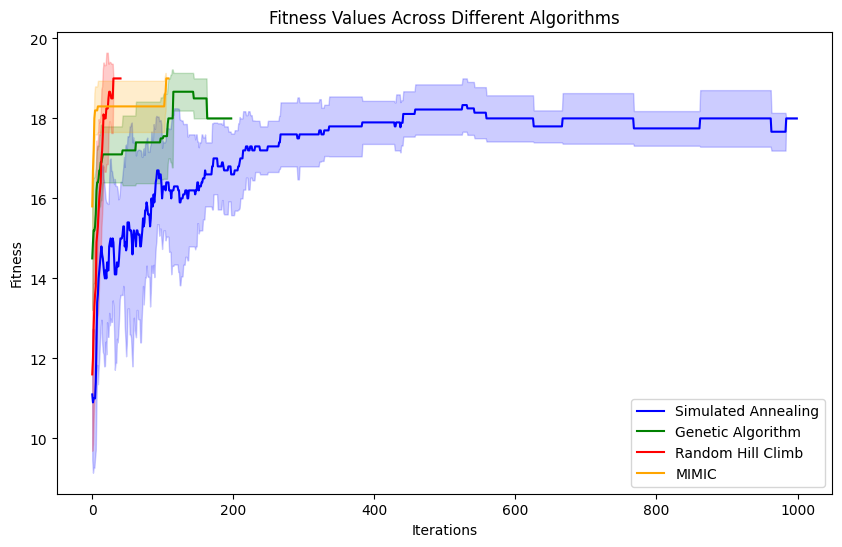

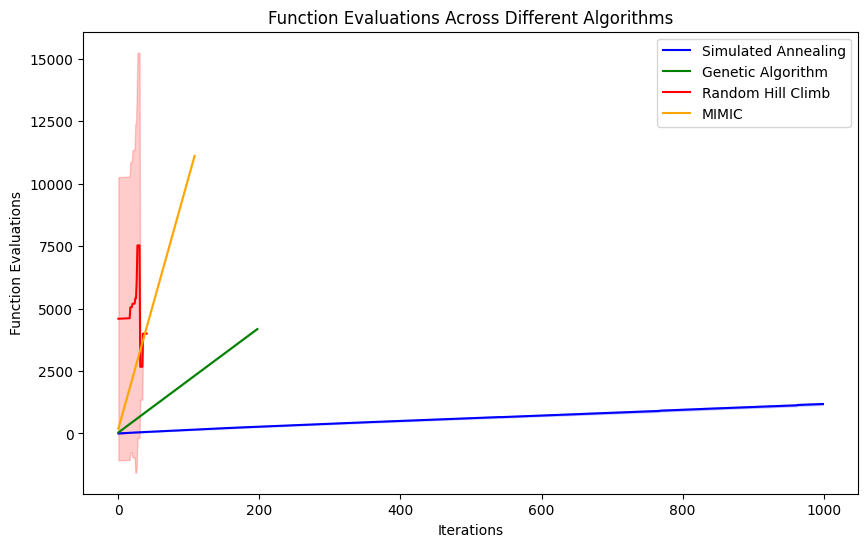

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of seeds and the random seeds array
seeds = [1,2,3,4,5,6,7,8,9,10]

# Placeholder lists to store fitness and function evaluation curves
fitness_curves_sa = []
fitness_curves_ga = []
fitness_curves_rhc = []
fitness_curves_mimic = []

fevals_curves_sa = []
fevals_curves_ga = []
fevals_curves_rhc = []
fevals_curves_mimic = []

schedule = mlrose.ExpDecay()
# Find the maximum number of iterations across all curves for padding
max_length = 1000  # Define a large enough length or compute dynamically if needed

# Function to pad curves to the same length
def pad_curve(curve, max_length):
    padded_curve = np.full((max_length, curve.shape[1]), np.nan)
    padded_curve[:curve.shape[0], :] = curve
    return padded_curve

# Iterate over each seed
for seed in seeds:
    # Simulated Annealing
    best_state, best_fitness, curve_sa = mlrose.simulated_annealing(problem, schedule=schedule,
                                                                    max_attempts=100, max_iters=1000,
                                                                    init_state=None, random_state=seed, curve=True)
    fitness_curves_sa.append(pad_curve(curve_sa[:, 0:1], max_length))  # pad only the fitness column
    fevals_curves_sa.append(pad_curve(curve_sa[:, 1:], max_length))    # pad only the fevals column

    # Genetic Algorithm
    best_state, best_fitness, curve_ga = mlrose.genetic_alg(problem, pop_size=20, mutation_prob=0.1,
                                                            max_attempts=100, max_iters=1000,
                                                            random_state=seed, curve=True)
    fitness_curves_ga.append(pad_curve(curve_ga[:, 0:1], max_length))
    fevals_curves_ga.append(pad_curve(curve_ga[:, 1:], max_length))

    # Random Hill Climb
    best_state, best_fitness, curve_rhc = mlrose.random_hill_climb(problem, max_iters=1000, restarts=1000,
                                                                   random_state=seed, curve=True)
    fitness_curves_rhc.append(pad_curve(curve_rhc[:, 0:1], max_length))
    fevals_curves_rhc.append(pad_curve(curve_rhc[:, 1:], max_length))

    # MIMIC
    best_state, best_fitness, curve_mimic = mlrose.mimic(problem, pop_size=100,
                                                          keep_pct=0.3,
                                                          max_attempts=100,
                                                          max_iters=1000,
                                                          curve=True,
                                                          random_state=seed )
    fitness_curves_mimic.append(pad_curve(curve_mimic[:, 0:1], max_length))
    fevals_curves_mimic.append(pad_curve(curve_mimic[:, 1:], max_length))



# Convert lists to numpy arrays for easier computation
fitness_curves_sa = np.array(fitness_curves_sa).squeeze()
fitness_curves_ga = np.array(fitness_curves_ga).squeeze()
fitness_curves_rhc = np.array(fitness_curves_rhc).squeeze()
fitness_curves_mimic = np.array(fitness_curves_mimic).squeeze()

fevals_curves_sa = np.array(fevals_curves_sa).squeeze()
fevals_curves_ga = np.array(fevals_curves_ga).squeeze()
fevals_curves_rhc = np.array(fevals_curves_rhc).squeeze()
fevals_curves_mimic = np.array(fevals_curves_mimic).squeeze()

# Compute mean and standard deviation for fitness values
mean_fitness_sa = np.nanmean(fitness_curves_sa, axis=0)
std_fitness_sa = np.nanstd(fitness_curves_sa, axis=0)

mean_fitness_ga = np.nanmean(fitness_curves_ga, axis=0)
std_fitness_ga = np.nanstd(fitness_curves_ga, axis=0)

mean_fitness_rhc = np.nanmean(fitness_curves_rhc, axis=0)
std_fitness_rhc = np.nanstd(fitness_curves_rhc, axis=0)

mean_fitness_mimic = np.nanmean(fitness_curves_mimic, axis=0)
std_fitness_mimic = np.nanstd(fitness_curves_mimic, axis=0)

# Compute mean and standard deviation for function evaluations
mean_fevals_sa = np.nanmean(fevals_curves_sa, axis=0)
std_fevals_sa = np.nanstd(fevals_curves_sa, axis=0)

mean_fevals_ga = np.nanmean(fevals_curves_ga, axis=0)
std_fevals_ga = np.nanstd(fevals_curves_ga, axis=0)

mean_fevals_rhc = np.nanmean(fevals_curves_rhc, axis=0)
std_fevals_rhc = np.nanstd(fevals_curves_rhc, axis=0)

mean_fevals_mimic = np.nanmean(fevals_curves_mimic, axis=0)
std_fevals_mimic = np.nanstd(fevals_curves_mimic, axis=0)

# Plot the mean fitness values with error bars for standard deviation
plt.figure(figsize=(10,6))
plt.plot(mean_fitness_sa, label='Simulated Annealing', color='blue')
plt.fill_between(range(len(mean_fitness_sa)), mean_fitness_sa - std_fitness_sa, mean_fitness_sa + std_fitness_sa, color='blue', alpha=0.2)

plt.plot(mean_fitness_ga, label='Genetic Algorithm', color='green')
plt.fill_between(range(len(mean_fitness_ga)), mean_fitness_ga - std_fitness_ga, mean_fitness_ga + std_fitness_ga, color='green', alpha=0.2)

plt.plot(mean_fitness_rhc, label='Random Hill Climb', color='red')
plt.fill_between(range(len(mean_fitness_rhc)), mean_fitness_rhc - std_fitness_rhc, mean_fitness_rhc + std_fitness_rhc, color='red', alpha=0.2)

plt.plot(mean_fitness_mimic, label='MIMIC', color='orange')
plt.fill_between(range(len(mean_fitness_mimic)), mean_fitness_mimic - std_fitness_mimic, mean_fitness_mimic + std_fitness_mimic, color='orange', alpha=0.2)

plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend()
plt.title('Fitness Values Across Different Algorithms')
plt.show()

# Plot the mean function evaluations with error bars for standard deviation
plt.figure(figsize=(10,6))
plt.plot(mean_fevals_sa, label='Simulated Annealing', color='blue')
plt.fill_between(range(len(mean_fevals_sa)), mean_fevals_sa - std_fevals_sa, mean_fevals_sa + std_fevals_sa, color='blue', alpha=0.2)

plt.plot(mean_fevals_ga, label='Genetic Algorithm', color='green')
plt.fill_between(range(len(mean_fevals_ga)), mean_fevals_ga - std_fevals_ga, mean_fevals_ga + std_fevals_ga, color='green', alpha=0.2)

plt.plot(mean_fevals_rhc, label='Random Hill Climb', color='red')
plt.fill_between(range(len(mean_fevals_rhc)), mean_fevals_rhc - std_fevals_rhc, mean_fevals_rhc + std_fevals_rhc, color='red', alpha=0.2)

plt.plot(mean_fevals_mimic, label='MIMIC', color='orange')
plt.fill_between(range(len(mean_fevals_mimic)), mean_fevals_mimic - std_fevals_mimic, mean_fevals_mimic + std_fevals_mimic, color='orange', alpha=0.2)

plt.xlabel('Iterations')
plt.ylabel('Function Evaluations')
plt.legend()
plt.title('Function Evaluations Across Different Algorithms')
plt.show()

In [53]:
#RHC
def algos(n = 4, max_attempts =500, max_iters = 1000, RANDOM_STATE = 1):
  fitness = mlrose.FlipFlop()
  problem = mlrose.DiscreteOpt(length=20, fitness_fn=fitness, maximize=True, max_val=2)

  results = {
    'algorithm': [],
    'fitness': [],
    'iterations': [],
    'time': [],
    'fitness_curve' : [],
    'ans': []
  }

  #RHC
  # BEST MAX ITRS :  50
  # BEST RESTARTS :  500
  start = time.time()
  # best_state , best_fitness, curve_rhc = mlrose.random_hill_climb(problem, max_iters=50, restarts=500, random_state= RANDOM_STATE)
  best_state , best_fitness, curve_rhc = mlrose.random_hill_climb(problem, max_iters=1000, restarts=1000, random_state= RANDOM_STATE)

  end = time.time()
  results['algorithm'].append('RHC')
  results['time'].append(end - start)
  results['ans'].append(best_state)
  results['fitness'].append(best_fitness)
  results['fitness_curve'].append(curve_rhc)


  #SA
  # BEST SCHEDULE ArithDecay(init_temp=1.0, decay=0.0001, min_temp=0.001)
  # BEST MAX ATTEMPTS 20
  # BEST MAX ITRS 10
  # BEST FITNESS 36.0
  schedule = mlrose.ExpDecay()
  # print(init_state)
  start = time.time()
  # best_state, best_fitness, curve_sa = mlrose.simulated_annealing(problem, schedule = schedule,
  #                                                       max_attempts = 20, max_iters = 10,
  #                                                       init_state = init_state, random_state = RANDOM_STATE , curve = True)
  best_state, best_fitness, curve_sa = mlrose.simulated_annealing(problem, schedule = schedule,
                                                        max_attempts = 100, max_iters = 1000,
                                                        init_state = None, random_state = RANDOM_STATE , curve = True)

  end = time.time()
  results['algorithm'].append('SA')
  results['time'].append(end - start)
  results['ans'].append(best_state)
  results['fitness'].append(best_fitness)
  results['fitness_curve'].append(curve_sa)


  # GA
  # BESt Pop seize 20
  # BEST MUTATION PROB 0.1
  # BEST MAX ITRS 100
  # BEST FITNESS 33.0
  population_size = 20
  mutation_prob = 0.1

  start = time.time()

  # Solve problem using the genetic algorithm
  best_state, best_fitness, curve_ga = mlrose.genetic_alg(problem, pop_size=population_size, mutation_prob=mutation_prob,
                                                        max_attempts=100, max_iters=1000, random_state=RANDOM_STATE , curve=True)
  end = time.time()
  results['algorithm'].append('GA')
  results['time'].append(end - start)
  results['ans'].append(best_state)
  results['fitness'].append(best_fitness)
  results['fitness_curve'].append(curve_ga)


  start = time.time()
  #MIMIC
  best_state, best_fitness, curve_ga = mlrose.mimic(problem, pop_size=100, keep_pct= 0.3,
                                                        max_attempts=max_attempts, max_iters=max_iters, random_state=RANDOM_STATE , curve=True)
  end = time.time()
  results['algorithm'].append('GA')
  results['time'].append(end - start)
  results['ans'].append(best_state)
  results['fitness'].append(best_fitness)
  results['fitness_curve'].append(curve_ga)


  return results


In [57]:
fitness_scores = {'GA' :[] , 'SA' : [] , 'RHC': [] , 'MIMIC':[]}
times = {'GA' :[] , 'SA' : [] , 'RHC': [] , 'MIMIC' :[]}
for i in range (3,50):
  results = algos(n = i, max_attempts =100, max_iters = 1000, RANDOM_STATE = 1)
  times['RHC'].append(results['time'][0])
  times['SA'].append(results['time'][1])
  times['GA'].append(results['time'][2])
  times['MIMIC'].append(results['time'][3])
  fitness_scores['RHC'].append(results['fitness'][0])
  fitness_scores['SA'].append(results['fitness'][1])
  fitness_scores['GA'].append(results['fitness'][2])
  fitness_scores['MIMIC'].append(results['fitness'][3])

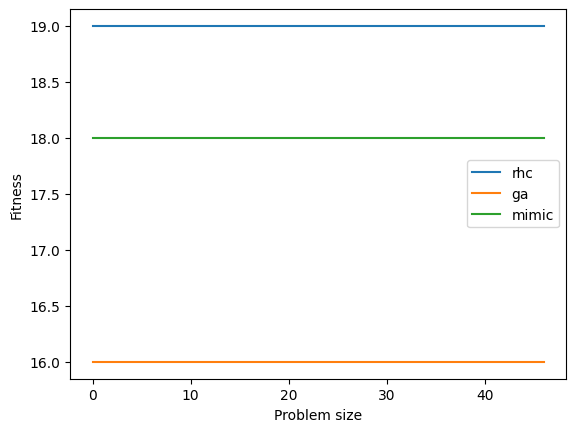

In [61]:
#FITNESS / SIZE
plt.plot( fitness_scores['RHC'] , label='rhc')
plt.plot( fitness_scores['SA'], label='sa')
plt.plot( fitness_scores['GA'], label='ga')
plt.plot( fitness_scores['MIMIC'], label='mimic')
plt.xlabel("Problem size")
plt.ylabel("Fitness")
plt.legend()
plt.show()

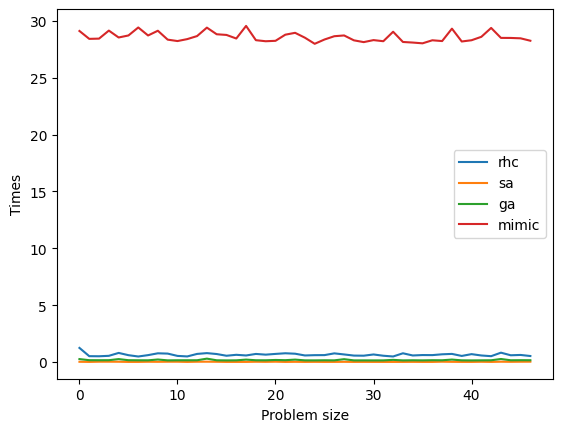

In [59]:
# FOR WALL CLOCK I LIKE TO SEE HOW TIME and problem SIZE were realted

plt.plot( times['RHC'] , label='rhc')
plt.plot( times['SA'], label='sa')
plt.plot( times['GA'], label='ga')
plt.plot( times['MIMIC'], label='mimic')
plt.xlabel("Problem size")
plt.ylabel("Times")
plt.legend()
plt.show()